# Logistic Regression
## Case Study
### Telecom churn analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
churn=pd.read_csv("C:/Users/mohan/Desktop/ML/Jupyter NB files/Logistic Regression/LRcode_forudemy_lyst9126/LRcode_forudemy/churn_data.csv")
customer=pd.read_csv("C:/Users/mohan/Desktop/ML/Jupyter NB files/Logistic Regression/LRcode_forudemy_lyst9126/LRcode_forudemy/customer_data.csv")
internet=pd.read_csv("C:/Users/mohan/Desktop/ML/Jupyter NB files/Logistic Regression/LRcode_forudemy_lyst9126/LRcode_forudemy/internet_data.csv")

In [3]:
churn.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [4]:
customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [5]:
internet.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


In [6]:
df=pd.merge(churn,customer,how='inner',on='customerID')

In [7]:
telecom=pd.merge(df,internet,how='inner',on='customerID')

In [8]:
telecom.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No


In [9]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [12]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

### Data preparation

In [14]:
# coverting yes to 1 and no to 0

telecom['PhoneService']=telecom['PhoneService'].map({'Yes':1,'No':0})
telecom['PaperlessBilling']=telecom['PaperlessBilling'].map({'Yes':1,'No':0})
telecom['Churn']=telecom['Churn'].map({'Yes':1,'No':0})
telecom['Partner']=telecom['Partner'].map({'Yes':1,'No':0})
telecom['Dependents']=telecom['Dependents'].map({'Yes':1,'No':0})


In [15]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [16]:
#var1=[['Contract','PaymentMethod','gender','MultipleLines',
 #      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
  #     'TechSupport', 'StreamingTV', 'StreamingMovies']]
#def onehot(var):
 #   telecomm=pd.get_dummies([var],prefix=var,drop_first=True)
#telecomm=telecomm.apply[onehot(var1)]

In [17]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [18]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check         

In [19]:
#converting total charges from str to float

telecom['TotalCharges']=telecom['TotalCharges'].apply(pd.to_numeric, downcast='float',errors='coerce')

In [20]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [21]:
# Checking for Outliers

telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.592219,64.761692,2283.300441,0.265370,0.162147,0.483033,0.299588,0.209144,...,0.438450,0.344881,0.439443,0.343888,0.493114,0.290217,0.398978,0.384353,0.395428,0.387903
std,24.559481,0.295752,0.491457,30.090047,2266.771363,0.441561,0.368612,0.499748,0.458110,0.406726,...,0.496232,0.475363,0.496355,0.475038,0.499988,0.453895,0.489723,0.486477,0.488977,0.487307
min,0.000000,0.000000,0.000000,18.250000,18.799999,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,401.449997,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,1397.475037,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,3794.737488,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,69.000000,1.000000,1.000000,102.600000,5976.639893,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
95%,72.000000,1.000000,1.000000,107.400000,6923.590063,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,72.000000,1.000000,1.000000,114.729000,8039.882993,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Checking for Missing values

telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [23]:
# checking the percentage of null values

round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [24]:
# dropping the null values

telecom=telecom[~np.isnan(telecom['TotalCharges'])]

In [25]:
# checking the percentage of null values

round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [26]:
telecom.head(2)

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [27]:
#Standardising   the values

df=telecom[['tenure','MonthlyCharges','TotalCharges']]

In [28]:
std=(df-df.mean())/df.std()

In [29]:
telecom=telecom.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
telecom=pd.concat([telecom,std],axis=1)

In [30]:
telecom.head(2)

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727


In [31]:
# checking the churn rate

telecom['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [32]:
round(100*(sum(telecom['Churn'])/len(telecom['Churn'].index)),2)

26.58

### Model building

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X=telecom.drop(['Churn','customerID'],axis=1)
Y=telecom['Churn']

In [35]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

In [36]:
# Running the first model

import statsmodels.api as sm


In [37]:
# Logistic Regression model

X_train=sm.add_constant(X_train)
log1=sm.GLM(Y_train,X_train,family=sm.families.Binomial())
log1.fit().summary()

C:\Users\mohan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 29 Mar 2020   Deviance:                       4009.4
Time:                        15:25:48   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
Streaming

In [38]:
# Corelation matrix

import matplotlib.pyplot as plt
import seaborn as sns

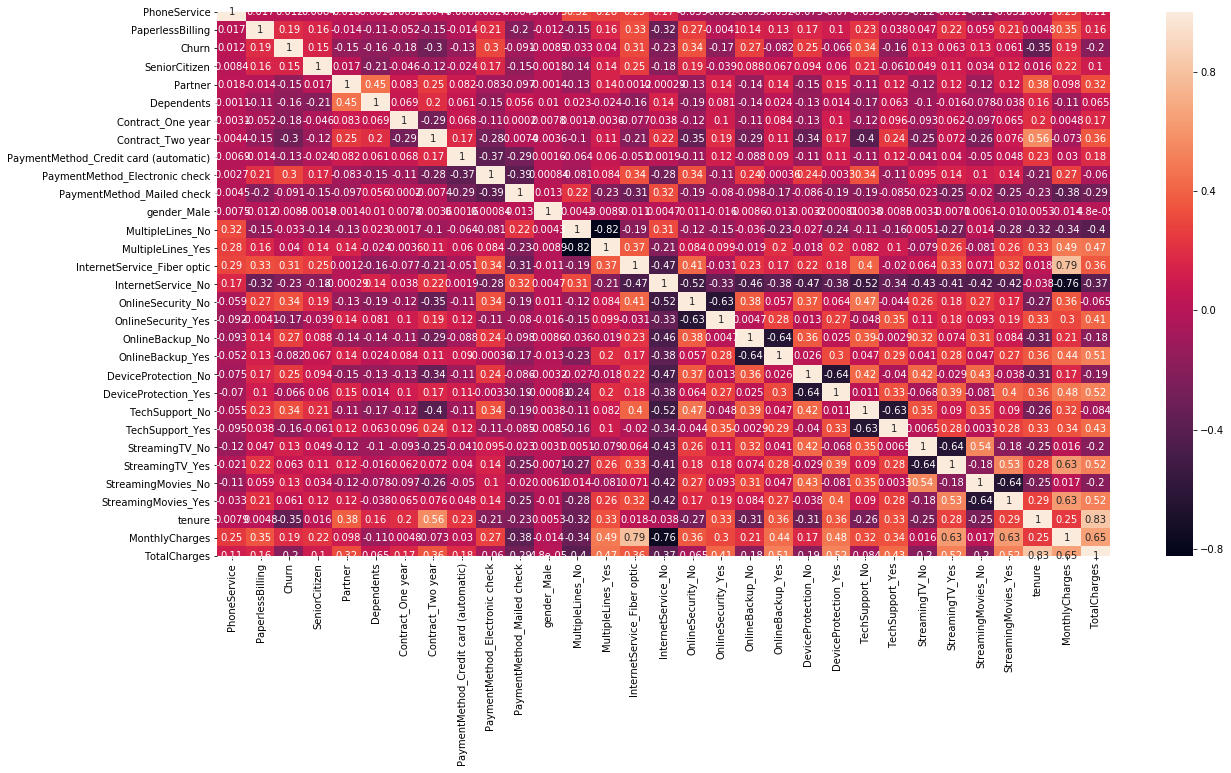

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)

In [40]:
# Dropping the highly corelated variables

X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

In [41]:
# VARIABLE INFLATION FACTOR (VIF) TO GET RID OF MULTI COLINEARITY         [[[[Multicolinearity]]]]



#def vif_cal(input_data, dependent_col):
 #   vif_df=pd.DataFrame(columns=['Var','Vif'])
  #  x_vars=input_data.drop([dependent_col],axis=1)
   # xvar_names=x_vars.columns
    #for i in range(0,xvar_names.shape[0]):
     #   y=x_vars[xvar_names[i]] 
      #  x=x_vars[xvar_names.drop(xvar_names[i])]
       # rsq=sm.OLS(y,x).fit().rsquared  
        #vif=round(1/(1-rsq),2)
        #vif_df.loc[i] = [xvar_names[i], vif]
    #return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

                

In [42]:
#vif_cal(input_data=telecom.drop(['customerID'],axis=1),dependent_col='Churn')

In [43]:
# Rerunning the model

X_train2=sm.add_constant(X_train2)
log2=sm.GLM(Y_train,X_train2,family=sm.families.Binomial())
log2.fit().summary()

C:\Users\mohan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 29 Mar 2020   Deviance:                       4009.4
Time:                        15:25:55   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

In [44]:
# Feature selection using RFE

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.feature_selection import RFE
rfe=RFE(lr,13)
rfe.fit(X_train2,Y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False  True  True False  True False False
  True  True  True False False False False  True  True False  True  True]
[12  1  1  1 11  8  1  1  5  1  4 10  1  1  1  7  9  2  6  1  1  3  1  1]


In [45]:
col=X_train2.columns[rfe.support_]

In [46]:
col

Index(['PhoneService', 'PaperlessBilling', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk=LogisticRegression()
logsk.fit(X_train[col],Y_train)

C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Comparing the model with the statsmodel

log4=sm.GLM(Y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
log4.fit().summary()

C:\Users\mohan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2051.0
Date:                Sun, 29 Mar 2020   Deviance:                       4101.9
Time:                        15:25:56   Pearson chi2:                 4.93e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.0852      0.335     -9.221      0.000      -3.741      -2.429
PhoneService                       0.6197      0.238      2.607      0.009       0.154       1.086
PaperlessBilling                   0.2917      0.089      3.291      0.001       0.118       0.465
SeniorCitizen                      0.4127      0.099      4.161      0.000       0.218       0.607
Contract_One year                 -0.8423      0.124     -6.786      0.000      -1.086      -0.599
Contract_Two year                 -1.5879      0.202     -7.874      0.000      -1.983      -1.193
PaymentMethod_Electronic check     0.3336      0.083      4.024      0.000       0.171       0.496
MultipleLines_Yes                  0.4108      0.103      4.007      0.000       0.210       0.612
InternetService_Fiber optic        1.9900      0.236      8.425      0.000       1.527       2.453
InternetService_No                -2.0589      0.321     -6.414      0.000      -2.688      -1.430
StreamingTV_Yes                    0.7840      0.135      5.822      0.000       0.520       1.048
StreamingMovies_Yes                0.6658      0.132      5.029      0.000       0.406       0.925
MonthlyCharges                    -1.1475      0.275     -4.178      0.000      -1.686      -0.609
TotalCharges                      -0.7599      0.072    -10.491      0.000      -0.902      -0.618
==================================================================================================
"""

In [49]:
# VARIABLE INFLATION FACTOR (VIF) TO GET RID OF MULTI COLINEARITY         [[[[Multicolinearity]]]]



def vif_cal(input_data, dependent_col):
    vif_df=pd.DataFrame(columns=['Var','Vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

                

In [50]:
telecom.columns

Index(['customerID', 'PhoneService', 'PaperlessBilling', 'Churn',
       'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [51]:
X_train[col].info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 879 to 5649
Data columns (total 13 columns):
PhoneService                      4922 non-null int64
PaperlessBilling                  4922 non-null int64
SeniorCitizen                     4922 non-null int64
Contract_One year                 4922 non-null uint8
Contract_Two year                 4922 non-null uint8
PaymentMethod_Electronic check    4922 non-null uint8
MultipleLines_Yes                 4922 non-null uint8
InternetService_Fiber optic       4922 non-null uint8
InternetService_No                4922 non-null uint8
StreamingTV_Yes                   4922 non-null uint8
StreamingMovies_Yes               4922 non-null uint8
MonthlyCharges                    4922 non-null float64
TotalCharges                      4922 non-null float64
dtypes: float64(2), int64(3), uint8(8)
memory usage: 269.2 KB


In [52]:
vif_cal(input_data=telecom.drop(['customerID','Partner', 'Dependents','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male', 'MultipleLines_No','OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No','OnlineBackup_Yes',
                                 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No','StreamingMovies_No',
                                 'tenure'],axis=1), dependent_col='Churn')

,Var,Vif
11,MonthlyCharges,13.30
0,PhoneService,7.20
12,TotalCharges,3.60
1,PaperlessBilling,2.91
2,SeniorCitizen,1.32
8,InternetService_No,0.90
3,Contract_One year,0.23
4,Contract_Two year,0.23
10,StreamingMovies_Yes,0.18
9,StreamingTV_Yes,0.15


In [53]:
col=['TotalCharges','PaperlessBilling','SeniorCitizen','InternetService_No','Contract_One year','Contract_Two year','StreamingMovies_Yes',
    'StreamingTV_Yes','MultipleLines_Yes','PaymentMethod_Electronic check','InternetService_Fiber optic' ]

In [54]:
log5=sm.GLM(Y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
log5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2060.3
Date:                Sun, 29 Mar 2020   Deviance:                       4120.6
Time:                        15:25:56   Pearson chi2:                 4.87e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.9737      0.117    -16.872      0.000      -2.203      -1.744
TotalCharges                      -0.8741      0.067    -12.979      0.000      -1.006      -0.742
PaperlessBilling                   0.3028      0.088      3.429      0.001       0.130       0.476
SeniorCitizen                      0.4444      0.099      4.504      0.000       0.251       0.638
InternetService_No                -0.9262      0.151     -6.152      0.000      -1.221      -0.631
Contract_One year                 -0.8924      0.123     -7.243      0.000      -1.134      -0.651
Contract_Two year                 -1.6593      0.201     -8.261      0.000      -2.053      -1.266
StreamingMovies_Yes                0.2846      0.093      3.055      0.002       0.102       0.467
StreamingTV_Yes                    0.3885      0.093      4.157      0.000       0.205       0.572
MultipleLines_Yes                  0.2213      0.092      2.411      0.016       0.041       0.401
PaymentMethod_Electronic check     0.3626      0.082      4.399      0.000       0.201       0.524
InternetService_Fiber optic        1.0727      0.097     11.026      0.000       0.882       1.263
==================================================================================================
"""

In [55]:
vif_cal(input_data=telecom.drop(['customerID','Partner', 'Dependents','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male', 'MultipleLines_No','OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No','OnlineBackup_Yes',
                                 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No','StreamingMovies_No',
                                 'tenure','MonthlyCharges','PhoneService'],axis=1), dependent_col='Churn')

,Var,Vif
0,PaperlessBilling,2.51
10,TotalCharges,2.22
1,SeniorCitizen,1.30
7,InternetService_No,0.33
2,Contract_One year,0.19
3,Contract_Two year,0.18
9,StreamingMovies_Yes,0.16
8,StreamingTV_Yes,0.14
5,MultipleLines_Yes,0.11
4,PaymentMethod_Electronic check,0.05


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk=LogisticRegression()
logsk.fit(X_train[col],Y_train)

C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Making Predictions

ypred=logsk.predict_proba(X_test[col])

In [58]:
# Converting ypred to a Dataframe which is an array

ypred_df=pd.DataFrame(ypred)

In [59]:
# Converting to column DataFrames

ypred1=ypred_df.iloc[:,[1]]

In [60]:
ypred1.head()

,1
0,0.448251
1,0.247595
2,0.024292
3,0.562751
4,0.019193


In [61]:
# converting Y_test to Dataframe
Y_test_df=pd.DataFrame(Y_test)

In [62]:
#putting CustomerID to index

Y_test_df['CustID']=Y_test_df.index

In [63]:
# Removing index for both dataframes to append them side by side 
ypred1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [64]:
# Appending Y_test_df and ypred1
ypred_final=pd.concat([Y_test_df,ypred1],axis=1)

In [65]:
# renaming the column

ypred_final=ypred_final.rename(columns={1:'Churn_Prob'})

In [66]:
# Rearranging the columns

ypred_final=ypred_final.reindex(['CustID','Churn','Churn_Prob'],axis=1)

In [67]:
ypred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.448251
1,3730,1,0.247595
2,1761,0,0.024292
3,2283,1,0.562751
4,1872,0,0.019193


In [68]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
ypred_final['predicted'] = ypred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [69]:
ypred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.448251,0
1,3730,1,0.247595,0
2,1761,0,0.024292,0
3,2283,1,0.562751,1
4,1872,0,0.019193,0


In [70]:
# Model evaluation

In [71]:
from sklearn import metrics
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

In [78]:
confusion=metrics.confusion_matrix(ypred_final.Churn,ypred_final.predicted)

In [79]:
metrics.accuracy_score(ypred_final.Churn,ypred_final.predicted)

0.7834123222748816

In [80]:
confusion

array([[1358,  170],
       [ 287,  295]], dtype=int64)

In [81]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [82]:
# sensitivity TPR , RECALL
TPR=TP/float(TP+FN)
TPR

0.506872852233677

In [83]:
# Specificity
TN/float(TN+FP)

0.8887434554973822

In [84]:
# Calculating False Positive rate Predicting churn when customer has not churned

FP/float(TN+FP)

0.11125654450261781

In [85]:
# ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

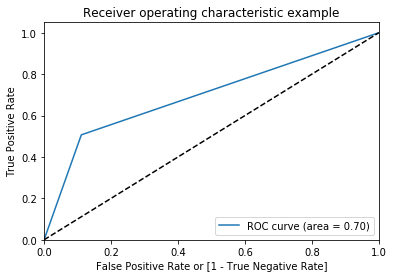

(array([0.        , 0.11125654, 1.        ]),
 array([0.        , 0.50687285, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [86]:
draw_roc(ypred_final.Churn, ypred_final.predicted)

### Finding Optimal Cutoff Point

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    ypred_final[i]= ypred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
ypred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.448251,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.247595,0,1,1,1,0,0,0,0,0,0,0
2,1761,0,0.024292,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.562751,1,1,1,1,1,1,1,0,0,0,0
4,1872,0,0.019193,0,1,0,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( ypred_final.Churn, ypred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  1.000000  0.000000
0.1   0.1  0.596682  0.946735  0.463351
0.2   0.2  0.688626  0.824742  0.636780
0.3   0.3  0.749763  0.733677  0.755890
0.4   0.4  0.773934  0.592784  0.842932
0.5   0.5  0.783412  0.506873  0.888743
0.6   0.6  0.781991  0.379725  0.935209
0.7   0.7  0.750711  0.158076  0.976440
0.8   0.8  0.732227  0.032646  0.998691
0.9   0.9  0.724171  0.000000  1.000000


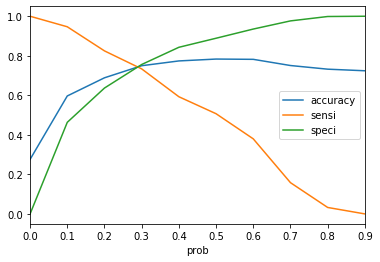

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [93]:
ypred_final['final_predicted'] = ypred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [94]:
ypred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.448251,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.247595,0,1,1,1,0,0,0,0,0,0,0,0
2,1761,0,0.024292,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.562751,1,1,1,1,1,1,1,0,0,0,0,1
4,1872,0,0.019193,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
#Let's check the overall accuracy.
metrics.accuracy_score( ypred_final.Churn, ypred_final.final_predicted)

0.7497630331753554

In [96]:
metrics.confusion_matrix( ypred_final.Churn, ypred_final.final_predicted )

array([[1155,  373],
       [ 155,  427]], dtype=int64)

In [104]:
import numpy as np
import pandas as pd

In [105]:
churn=pd.read_csv("C:/Users/mohan/Desktop/ML/Jupyter NB files/Logistic Regression/LRcode_forudemy_lyst9126/LRcode_forudemy/churn_data.csv")
customer=pd.read_csv("C:/Users/mohan/Desktop/ML/Jupyter NB files/Logistic Regression/LRcode_forudemy_lyst9126/LRcode_forudemy/customer_data.csv")
internet=pd.read_csv("C:/Users/mohan/Desktop/ML/Jupyter NB files/Logistic Regression/LRcode_forudemy_lyst9126/LRcode_forudemy/internet_data.csv")

In [106]:
df=pd.merge(churn,customer,how='inner',on='customerID')

In [107]:
telecom=pd.merge(df,internet,how='inner',on='customerID')

In [108]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [109]:
telcat=telecom.select_dtypes(include=['object'])
telcat.head(2)

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,Month-to-month,Yes,Electronic check,29.85,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,One year,No,Mailed check,1889.5,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No


In [110]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
telcat=telcat.apply(le.fit_transform)
telcat.head(2)

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,5375,0,0,1,2,2505,0,0,1,0,1,0,0,2,0,0,0,0
1,3962,1,1,0,3,1466,0,1,0,0,0,0,2,0,2,0,0,0
